In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
pd.options.display.max_columns = 200

In [2]:
df = pd.read_csv("Exercices/bankingData.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


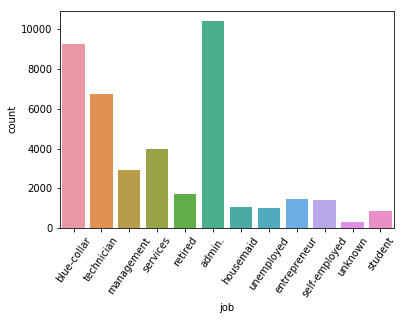

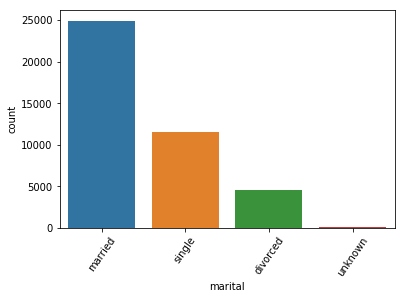

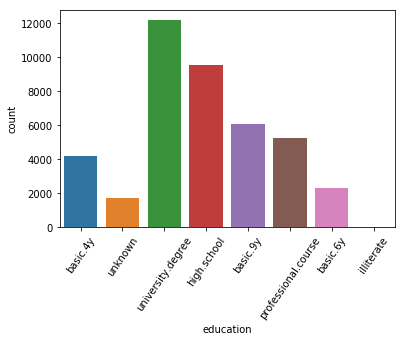

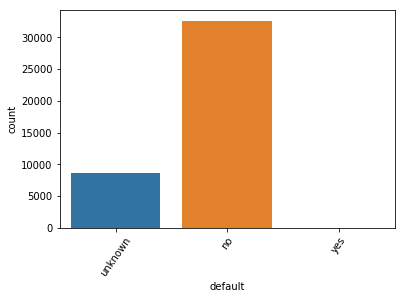

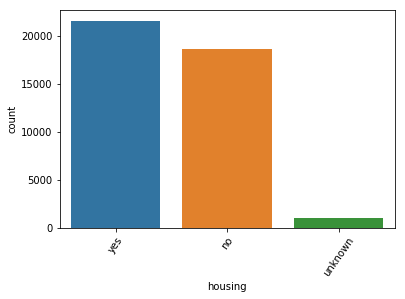

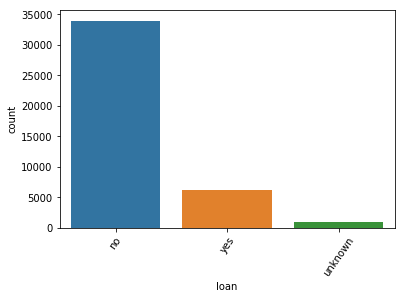

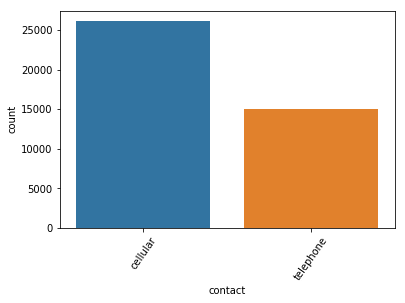

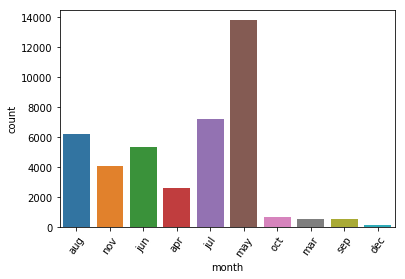

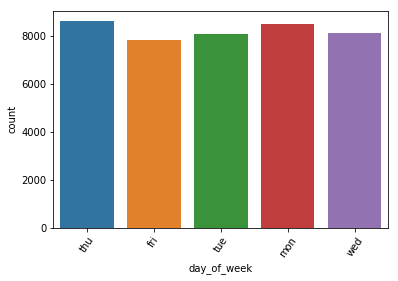

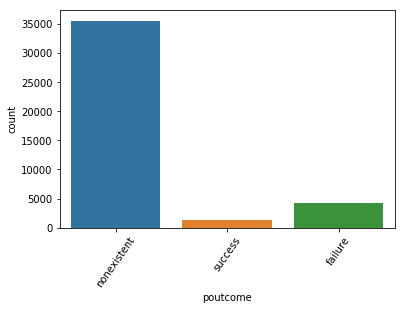

In [5]:
for col in df.columns.tolist():
    if df[col].dtype == 'object' :
        sns.countplot(col ,data = df)
        plt.xticks(rotation = 55)
        plt.show()

## Combining Education Values

In [6]:
df["education"] = np.where(df["education"] == "basic.4y", 'Basics', df["education"])
df["education"] = np.where(df["education"] == "basic.6y", 'Basics', df["education"])
df["education"] = np.where(df["education"] == "basic.9y", 'Basics', df["education"])

In [7]:
corr_matrix = df.corr()

In [8]:
corr_matrix["y"].sort_values(ascending=False)

y                 1.000000
duration          0.405274
previous          0.230181
cons_conf_idx     0.054878
age               0.030399
campaign         -0.066357
cons_price_idx   -0.136211
emp_var_rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr_employed      -0.354678
Name: y, dtype: float64

## Dropping Numerical Variables

In [9]:
df.drop("duration", axis=1)
df.drop("cons_conf_idx", axis=1)
df.drop("age", axis=1)
df.drop("campaign", axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basics,unknown,yes,no,cellular,aug,thu,210,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,Basics,no,yes,no,cellular,aug,fri,137,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,Basics,no,yes,no,cellular,jul,tue,68,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,Basics,no,yes,no,cellular,may,thu,204,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,Basics,no,yes,no,cellular,may,fri,191,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,174,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,Basics,no,yes,no,cellular,apr,thu,191,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


## Encoding categoricals

In [41]:
#get dummies
df = pd.get_dummies(df,drop_first=True)

In [42]:
df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Feature Selection

In [45]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(df.loc[:, df.columns != 'y'], df["y"] )
print(rfe.support_)
print(rfe.ranking_)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[False False False False False False False False  True False  True  True
 False False  True False  True  True False False False False False False
 False False False False False  True False False False False False  True
 False  True  True  True  True  True  True False  True  True False False
 False  True  True]
[26 22  9 28 23 12 16 13  1 20  1  1 27 30  1  5  1  1 18 21 34 11 10 32
 24 29 17  4  3  1 33 15 31 19 14  1  8  1  1  1  1  1  1 25  1  1  7  6
  2  1  1]


## Train test

In [30]:
X = df.loc[:, df.columns != 'y']
y = df["y"]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Regresion

In [32]:
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression() # on définit le modèle de régression logistique à appliquer aux données

logisticreg.fit(X_train, y_train) # estimation du modèle
y_pred = logisticreg.predict(X_test) # predictions du modèle
y_pred_train = logisticreg.predict(X_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
from sklearn.metrics import confusion_matrix
Conf_matrix_test = confusion_matrix(y_test, y_pred)
Conf_matrix_train = confusion_matrix(y_train, y_pred_train)

In [34]:
print(Conf_matrix_train)
print(Conf_matrix_test)

[[24899   668]
 [ 1982  1282]]
[[10718   263]
 [  814   562]]


In [35]:
logisticreg.score(X_test, y_test)

0.9128429230395727

## ROC Curve

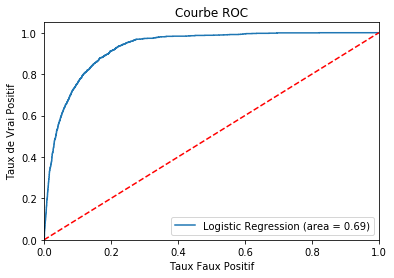

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logisticreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux Faux Positif')
plt.ylabel('Taux de Vrai Positif')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()